使用ml中的函数方法来预测婴儿生存率，
数据来源 http://www.tomdrabas.com/data/LearningPySpark/births_transformed.csv.gz

In [1]:
import pyspark.sql.types as typ
from pyspark.ml import Pipeline
import pyspark.ml.classification as cl
import pyspark.ml.evaluation as ev
import pandas as pd
import numpy as np
import os
from pyspark.sql import SparkSession,SQLContext

In [2]:
spark = SparkSession\
    .builder \
    .appName("births_transformed") \
    .config("spark.some.config.option", "setting") \
    .getOrCreate()

#  1 分类

In [3]:
labels = [('INFANT_ALIVE_AT_REPORT', typ.IntegerType()),
          ('BIRTH_PLACE', typ.StringType()),
          ('MOTHER_AGE_YEARS', typ.IntegerType()),
          ('FATHER_COMBINE_AGE', typ.IntegerType()),
          ('CIG_BEFORE', typ.IntegerType()),
          ('CIG_1_TRI', typ.IntegerType()),
          ('CIG_2_TRI', typ.IntegerType()),
          ('CIG_3_TRI', typ.IntegerType()),
          ('MOTHER_HEIGHT_IN', typ.IntegerType()),
          ('MOTHER_PRE_WEIGHT', typ.IntegerType()),
          ('MOTHER_DELIVERY_WEIGHT', typ.IntegerType()),
          ('MOTHER_WEIGHT_GAIN', typ.IntegerType()),
          ('DIABETES_PRE', typ.IntegerType()),
          ('DIABETES_GEST', typ.IntegerType()),
          ('HYP_TENS_PRE', typ.IntegerType()),
          ('HYP_TENS_GEST', typ.IntegerType()),
          ('PREV_BIRTH_PRETERM', typ.IntegerType())
          ]

schema = typ.StructType([
    typ.StructField(e[0], e[1], False) for e in labels
])

births = spark.read.csv(
    'births_transformed.csv', header=True, schema=schema)

# births = spark.read.csv(
#     'births_transformed.csv', header=True, inferSchema=True)
births.show(3)

+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+
|INFANT_ALIVE_AT_REPORT|BIRTH_PLACE|MOTHER_AGE_YEARS|FATHER_COMBINE_AGE|CIG_BEFORE|CIG_1_TRI|CIG_2_TRI|CIG_3_TRI|MOTHER_HEIGHT_IN|MOTHER_PRE_WEIGHT|MOTHER_DELIVERY_WEIGHT|MOTHER_WEIGHT_GAIN|DIABETES_PRE|DIABETES_GEST|HYP_TENS_PRE|HYP_TENS_GEST|PREV_BIRTH_PRETERM|
+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+
|                     0|          1|              29|                99|         0|        0|        0|        0|              99|              999|                   999|                99|           0|     

## 1.1 数据处理

### PySpark 数据框操作

#### 统计信息

In [45]:
births.describe('INFANT_ALIVE_AT_REPORT','BIRTH_PLACE').show()

+-------+----------------------+-------------------+
|summary|INFANT_ALIVE_AT_REPORT|        BIRTH_PLACE|
+-------+----------------------+-------------------+
|  count|                 45429|              45429|
|   mean|    0.5139668493693456| 1.0556032490259526|
| stddev|    0.4998103900865398|0.44711381563465835|
|    min|                     0|                  1|
|    max|                     1|                  9|
+-------+----------------------+-------------------+



#### 过滤数据

In [ ]:
births.filter(births.INFANT_ALIVE_AT_REPORT=='0').show(2)
#多个条件过滤
births.filter((births.INFANT_ALIVE_AT_REPORT=='0') & (births.BIRTH_PLACE=='1')).show(2)
births.filter((births.INFANT_ALIVE_AT_REPORT=='0') | (births.BIRTH_PLACE=='1')).show(2)

#### 排序

In [24]:
births.orderBy('INFANT_ALIVE_AT_REPORT',ascending=False).show(1)

+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+
|INFANT_ALIVE_AT_REPORT|BIRTH_PLACE|MOTHER_AGE_YEARS|FATHER_COMBINE_AGE|CIG_BEFORE|CIG_1_TRI|CIG_2_TRI|CIG_3_TRI|MOTHER_HEIGHT_IN|MOTHER_PRE_WEIGHT|MOTHER_DELIVERY_WEIGHT|MOTHER_WEIGHT_GAIN|DIABETES_PRE|DIABETES_GEST|HYP_TENS_PRE|HYP_TENS_GEST|PREV_BIRTH_PRETERM|
+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+
|                     1|          1|              28|                28|         0|        0|        0|        0|              62|              120|                   148|                28|           0|     

In [26]:
births.select('INFANT_ALIVE_AT_REPORT').distinct().show()

+----------------------+
|INFANT_ALIVE_AT_REPORT|
+----------------------+
|                     1|
|                     0|
+----------------------+



#### 分组

In [35]:
births.groupby('INFANT_ALIVE_AT_REPORT').sum().show()

+----------------------+---------------------------+---------------------+-----------------------+---------------+--------------+--------------+--------------+---------------------+----------------------+---------------------------+-----------------------+-----------------+------------------+-----------------+------------------+-----------------------+
|INFANT_ALIVE_AT_REPORT|sum(INFANT_ALIVE_AT_REPORT)|sum(MOTHER_AGE_YEARS)|sum(FATHER_COMBINE_AGE)|sum(CIG_BEFORE)|sum(CIG_1_TRI)|sum(CIG_2_TRI)|sum(CIG_3_TRI)|sum(MOTHER_HEIGHT_IN)|sum(MOTHER_PRE_WEIGHT)|sum(MOTHER_DELIVERY_WEIGHT)|sum(MOTHER_WEIGHT_GAIN)|sum(DIABETES_PRE)|sum(DIABETES_GEST)|sum(HYP_TENS_PRE)|sum(HYP_TENS_GEST)|sum(PREV_BIRTH_PRETERM)|
+----------------------+---------------------------+---------------------+-----------------------+---------------+--------------+--------------+--------------+---------------------+----------------------+---------------------------+-----------------------+-----------------+----------------

#### 执行SQL查询

In [43]:
births.registerTempTable('birth_table')
sqlContext=SQLContext(spark)
sqlContext.sql('select * from birth_table').show(1)

+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+
|INFANT_ALIVE_AT_REPORT|BIRTH_PLACE|MOTHER_AGE_YEARS|FATHER_COMBINE_AGE|CIG_BEFORE|CIG_1_TRI|CIG_2_TRI|CIG_3_TRI|MOTHER_HEIGHT_IN|MOTHER_PRE_WEIGHT|MOTHER_DELIVERY_WEIGHT|MOTHER_WEIGHT_GAIN|DIABETES_PRE|DIABETES_GEST|HYP_TENS_PRE|HYP_TENS_GEST|PREV_BIRTH_PRETERM|
+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+
|                     0|          1|              29|                99|         0|        0|        0|        0|              99|              999|                   999|                99|           0|     

#### 离散连续变量
我们常常需要处理高度非线性连续特征，很难只用一个系数来供给模型。这种情况下，可能难以用一个系数来解释这样的特征与目标之间的关系。有时候，将值划分成分类级别是很有用的。

In [110]:
# 使用QuantileDiscretizer模型将连续变量分为五个分类级别
discretizer = ft.QuantileDiscretizer(
    numBuckets=5, 
    inputCol='DIABETES_GEST',
    outputCol='discritized'
)

data_discretized = discretizer.fit(birth_train).transform(birth_test)
data_discretized.select("DIABETES_GEST").show(5,truncate=False)

+-------------+
|DIABETES_GEST|
+-------------+
|0            |
|0            |
|0            |
|0            |
|0            |
+-------------+
only showing top 5 rows



####  标准化连续变量

In [120]:
# 标准化连续变量
# 首先，要创建一个向量代表连续变量（因为它只是一个float）
outputCol='DIABETES_GEST_continuous_vec'
vectorizer = ft.VectorAssembler(inputCols=['DIABETES_GEST'],
                               outputCol=outputCol)
normlizer = ft.StandardScaler(inputCol=vectorizer.getOutputCol(),
                             outputCol='normlized',
                             withMean=True,
                             withStd=True)
pipeline = Pipeline(stages=[vectorizer, normlizer])
data_standardized = pipeline.fit(birth_train).transform(birth_train)
data_standardized.show(4)

+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+---------------+----------------------------+--------------------+
|INFANT_ALIVE_AT_REPORT|BIRTH_PLACE|MOTHER_AGE_YEARS|FATHER_COMBINE_AGE|CIG_BEFORE|CIG_1_TRI|CIG_2_TRI|CIG_3_TRI|MOTHER_HEIGHT_IN|MOTHER_PRE_WEIGHT|MOTHER_DELIVERY_WEIGHT|MOTHER_WEIGHT_GAIN|DIABETES_PRE|DIABETES_GEST|HYP_TENS_PRE|HYP_TENS_GEST|PREV_BIRTH_PRETERM|BIRTH_PLACE_INT|DIABETES_GEST_continuous_vec|           normlized|
+----------------------+-----------+----------------+------------------+----------+---------+---------+---------+----------------+-----------------+----------------------+------------------+------------+-------------+------------+-------------+------------------+---------------+----------------------------+--------------------+
|         

## 1.2 建模

### 1.2.1 创建转换器

In [60]:
# 创建转换器、评估器
import  pyspark.ml.feature as ft
#adding a column or replacing the existing column that has the same name
births = births.withColumn('BIRTH_PLACE_INT', births['BIRTH_PLACE']\
    .cast(typ.IntegerType()))

# birth place使用one-hot编码
encoder = ft.OneHotEncoder(inputCol='BIRTH_PLACE_INT',
                           outputCol='BIRTH_PLACE_VEC')

# 创建单一的列将所有特征整合在一起
# encoder.getOutputCol() 输出列名 'BIRTH_PLACE_VEC'
featuresCreator = ft.VectorAssembler(
    inputCols=[col[0] for col in labels[2:]] + [encoder.getOutputCol()],
    outputCol='features'
)

# 创建一个评估器
import pyspark.ml.classification as cl

logistic = cl.LogisticRegression(maxIter=10,
                                regParam=0.01,
                                featuresCol=featuresCreator.getOutputCol(),
                                labelCol='INFANT_ALIVE_AT_REPORT')

###  1.2.2 创建一个管道、拟合模型

In [66]:
# 创建一个管道
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[encoder, featuresCreator, logistic])

# 拟合模型
birth_train, birth_test = births.randomSplit([0.7,0.3],seed=123)

model = pipeline.fit(birth_train)
test_model = model.transform(birth_test)

In [157]:
dec=cl.DecisionTreeClassifier(featuresCol=featuresCreator.getOutputCol(),
                                labelCol='INFANT_ALIVE_AT_REPORT')

pipeline = Pipeline(stages=[encoder, featuresCreator, dec])

model = pipeline.fit(birth_train)
test_model = model.transform(birth_test)

In [158]:
gbt=cl.GBTClassifier(featuresCol=featuresCreator.getOutputCol(),
                                labelCol='INFANT_ALIVE_AT_REPORT')
pipeline = Pipeline(stages=[encoder, featuresCreator, gbt])

model = pipeline.fit(birth_train)
test_model = model.transform(birth_test)

In [161]:
rf=cl.RandomForestClassifier(featuresCol=featuresCreator.getOutputCol(),
                                labelCol='INFANT_ALIVE_AT_REPORT')
pipeline = Pipeline(stages=[encoder, featuresCreator, gbt])

model = pipeline.fit(birth_train)
test_model = model.transform(birth_test)

 ### 1.2.3 评估模型

In [68]:
# 评估模型性能
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability',
    labelCol='INFANT_ALIVE_AT_REPORT'
)

print(evaluator.evaluate(test_model, {evaluator.metricName:'areaUnderROC'}))
print(evaluator.evaluate(test_model, {evaluator.metricName:'areaUnderPR'}))

0.7388890714322204
0.7105608237198974


### 1.2.4 保存模型

In [77]:
# 保存模型pipeline
pipelinePath = './infant_oneHotEncoder_Logistic_Pipeline'
pipeline.write().overwrite().save(pipelinePath)

# 重载模型pipeline
loadedPipeline = Pipeline.load(pipelinePath)
loadedPipeline.fit(birth_train).transform(birth_test).take(1)

# 保存模型
from pyspark.ml import PipelineModel

modelPath = './infant_oneHotEncoder_LogisticPipelineModel'
model.write().overwrite().save(modelPath)

# 载入模型
loadedPipelineModel = PipelineModel.load(modelPath)
test_reloadedModel = loadedPipelineModel.transform(birth_test)
test_reloadedModel.take(1)

[Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE='1', MOTHER_AGE_YEARS=13, FATHER_COMBINE_AGE=99, CIG_BEFORE=0, CIG_1_TRI=0, CIG_2_TRI=0, CIG_3_TRI=0, MOTHER_HEIGHT_IN=57, MOTHER_PRE_WEIGHT=100, MOTHER_DELIVERY_WEIGHT=108, MOTHER_WEIGHT_GAIN=8, DIABETES_PRE=0, DIABETES_GEST=0, HYP_TENS_PRE=0, HYP_TENS_GEST=0, PREV_BIRTH_PRETERM=0, BIRTH_PLACE_INT=1, BIRTH_PLACE_VEC=SparseVector(9, {1: 1.0}), features=SparseVector(24, {0: 13.0, 1: 99.0, 6: 57.0, 7: 100.0, 8: 108.0, 9: 8.0, 16: 1.0}), rawPrediction=DenseVector([0.7027, -0.7027]), probability=DenseVector([0.6688, 0.3312]), prediction=0.0)]

### 1.2.5 超参调优

#### gird search 和train-validation splitting

In [84]:
# 超参调优：grid search和train-validation splitting 

# 网格搜索
import pyspark.ml.tuning as tune

logistic = cl.LogisticRegression(labelCol='INFANT_ALIVE_AT_REPORT')
grid = tune.ParamGridBuilder()\
    .addGrid(logistic.maxIter, [5,10,50])\
    .addGrid(logistic.regParam, [0.01,0.05,0.3])\
    .build()

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability',
    labelCol='INFANT_ALIVE_AT_REPORT'
)

# 使用K-Fold交叉验证评估各种参数的模型
cv = tune.CrossValidator(
    estimator=logistic,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3
)

# 创建一个构建特征的pipeline
pipeline = Pipeline(stages=[encoder, featuresCreator])
birth_train, birth_test = births.randomSplit([0.7,0.3],seed=123) # 重新打开数据进行处理
data_transformer = pipeline.fit(birth_train)
data_test = data_transformer.transform(birth_test)


# cvModel 返回估计的最佳模型
cvModel = cv.fit(data_transformer.transform(birth_train))
results = cvModel.transform(data_test)

print(evaluator.evaluate(results, {evaluator.metricName:'areaUnderROC'}))
print(evaluator.evaluate(results, {evaluator.metricName:'areaUnderPR'}))


0.7396088056359407
0.712054027633397


#### 查看模型最佳参数

In [99]:
param_maps = cvModel.getEstimatorParamMaps()
eval_metrics = cvModel.avgMetrics

param_res = []

for params, metric in zip(param_maps, eval_metrics):
    param_metric = {}
    for key, param_val in zip(params.keys(), params.values()):
        param_metric[key.name]=param_val
    param_res.append((param_metric, metric))

sorted(param_res, key=lambda x:x[1], reverse=True)


[({'maxIter': 50, 'regParam': 0.01}, 0.7383169326246161),
 ({'maxIter': 10, 'regParam': 0.01}, 0.7359418605087911),
 ({'maxIter': 50, 'regParam': 0.05}, 0.7329773273482909),
 ({'maxIter': 10, 'regParam': 0.05}, 0.7311161703881676),
 ({'maxIter': 10, 'regParam': 0.3}, 0.7222756507888913),
 ({'maxIter': 50, 'regParam': 0.3}, 0.7192552175136916),
 ({'maxIter': 5, 'regParam': 0.01}, 0.7159320378442128),
 ({'maxIter': 5, 'regParam': 0.05}, 0.7153360228334891),
 ({'maxIter': 5, 'regParam': 0.3}, 0.7149080726681669)]

#### 使用1-Fold的交叉验证

In [106]:
# Train-validation划分

# 使用卡方检验选择特征
selector = ft.ChiSqSelector(
    numTopFeatures=5,
    featuresCol=featuresCreator.getOutputCol(),
    outputCol='selectedFeatures',
    labelCol='INFANT_ALIVE_AT_REPORT'
)

logistic = cl.LogisticRegression(labelCol='INFANT_ALIVE_AT_REPORT',
                                featuresCol='selectedFeatures')

pipeline = Pipeline(stages=[encoder, featuresCreator, selector])
data_transformer = pipeline.fit(birth_train)

tvs = tune.TrainValidationSplit(estimator=logistic,
                               estimatorParamMaps=grid,
                               evaluator=evaluator,
                                trainRatio=0.75
                               )

tvsModel = tvs.fit(data_transformer.transform(birth_train))
data_test = data_transformer.transform(birth_test)
results = tvsModel.transform(data_test)

print(evaluator.evaluate(results, {evaluator.metricName:'areaUnderROC'}))
print(evaluator.evaluate(results, {evaluator.metricName:'areaUnderPR'}))

0.6129963621116077
0.5799248094822335


其他案例

# 2 聚类

数据来源：https://www.kaggle.com/arjunbhasin2013/ccdata
该数据集由超过6个月的9K名活跃信用卡持卡人及其交易和账户属性组成。其想法是制定一个客户细分的营销策略。

In [14]:
from pyspark.sql import SparkSession
 
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()
 
data_customer=spark.read.csv('./CC GENERAL.csv', header=True, inferSchema=True)
 
data_customer.printSchema()



root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



In [126]:
data_customer=data_customer.na.drop()
from pyspark.ml.feature import VectorAssembler
data_customer.columns
 
assemble=VectorAssembler(inputCols=[
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE'], outputCol='features')
 
assembled_data=assemble.transform(data_customer)
 
assembled_data.show(2)


+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+
| C10001|  40.900749|       

In [127]:
from pyspark.ml.feature import StandardScaler
 
scale=StandardScaler(inputCol='features',outputCol='standardized')
 
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
 
data_scale_output.show(2)


+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------------------+--------------------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|        standardized|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+--------

In [128]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
 
silhouette_score=[]
 
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
 
for i in range(2,10):
 
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
 
    KMeans_fit=KMeans_algo.fit(data_scale_output)
 
    output=KMeans_fit.transform(data_scale_output)
 
 
 
    score=evaluator.evaluate(output)
 
    silhouette_score.append(score)
 
    print("Silhouette Score:",score)


Silhouette Score: 0.2978057438397949
Silhouette Score: 0.28213459315975054
Silhouette Score: 0.23556066506177795
Silhouette Score: 0.30043360808586705
Silhouette Score: 0.22875540553791132
Silhouette Score: 0.3107943779144613
Silhouette Score: 0.31073584003246785
Silhouette Score: 0.3130176826230892


Text(0, 0.5, 'cos')

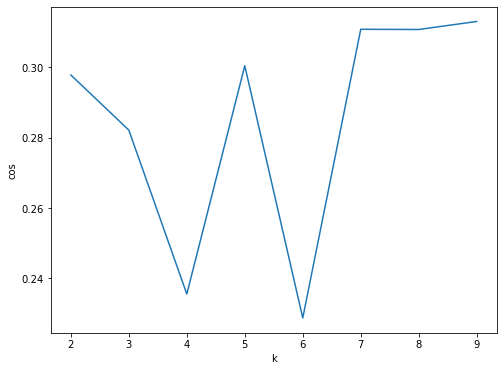

In [129]:
# 可视化轮廓分数
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cos')


# 3 回归

数据集简介  https://datahack.analyticsvidhya.com/contest/black-friday/

某零售公司想要了解针对不同类别的各种产品的顾客购买行为（购买量）。他们为上个月选定的大批量产品分享了各种客户的购买汇总。该数据集还包含客户人口统计信息(age, gender, marital status, city_type, stay_in_current_city)，产品详细信息（product_id and product category）以及上个月的purchase_amount总数。现在，他们希望建立一个模型来预测客户对各种产品的购买量，这将有助于他们为不同产品的客户创建个性化的产品。

In [132]:
from pyspark.sql import SparkSession
 
spark = SparkSession\
    .builder \
    .appName("test") \
    .config("spark.some.config.option", "setting") \
    .getOrCreate()
    
train = spark.read.csv('./BlackFriday/train.csv', header=True, inferSchema=True)
test = spark.read.csv('./BlackFriday/test.csv', header=True,  inferSchema=True)
train.printSchema()
# 查看数据框架中的行数
print(train.count())
print(test.count())

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)

550068
233599


In [134]:
# 通过调用drop()方法，可以检查train上非空数值的个数，并进行测试。默认情况下，drop()方法将删除包含任何空值的行。我们还可以通过设置参数“all”,当且仅当该行所有参数都为null时以删除该行。这与pandas上的drop方法类似。
train.na.drop('any').count(),test.na.drop("any").count()
# 填补
train=train.fillna(-1)
test=test.fillna(-1)


In [135]:
# 分析数值特征
train.describe().show()

+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|           550068|       550068|                    550068|             550068|            550068|            550068|            550068|           550068|
|   mean|1003028.8424013031|      null|  null|  null|8.076706879876669|         null|         1.468494139793958|0.40965298835780306| 5.404270017525106| 6.41976991935542

In [136]:
# 选择某一列
train.select('User_ID',"Age").show(5)

+-------+----+
|User_ID| Age|
+-------+----+
|1000001|0-17|
|1000001|0-17|
|1000001|0-17|
|1000001|0-17|
|1000002| 55+|
+-------+----+
only showing top 5 rows



In [137]:
# 分类特征
# “train”和“test”中Product_ID的不同类别的数量。这可以通过应用distinct()和count()方法
train.select('Product_ID').distinct().count(),test.select('Product_ID').distinct().count()


(3631, 3491)

In [138]:
# 在计算“train”和“test”的不同值的数量后，我们可以看到“train”和“test”有更多的类别。让我们使用相减方法检查Product_ID的类别，这些类别正在"test"中，但不在“train”中。我们也可以对所有的分类特征做同样的处理。
diff_cat_in_train_test=test.select('Product_ID').subtract(train.select('Product_ID'))
diff_cat_in_train_test.distinct().count()
diff_cat_in_train_test.distinct().show(5)


+----------+
|Product_ID|
+----------+
| P00322642|
| P00300142|
| P00077642|
| P00249942|
| P00294942|
+----------+
only showing top 5 rows



In [140]:
# 将分类变量转换为标签
from pyspark.ml.feature import StringIndexer
plan_indexer=StringIndexer(inputCol='Product_ID',outputCol='product_id_trans')
labeller=plan_indexer.fit(train)
train1=labeller.transform(train)
test1=labeller.transform(test)
train1.select('product_id_trans').show(5)

+----------------+
|product_id_trans|
+----------------+
|           765.0|
|           183.0|
|          1496.0|
|           480.0|
|           860.0|
+----------------+
only showing top 5 rows



In [ ]:
#  选择特征来构建机器学习模型
from pyspark.ml.feature import RFormula
# 这个公式中指定依赖和独立的列；我们还必须为为features列和label列指定名称。
formula=RFormula(formula="Purchase ~ Age+ Occupation +City_Category+Stay_In_Current_City_Years+Product_Category_1+Product_Category_2+ Gender",\
                 featuresCol='features',labelCol='label')
#将这个公式应用到我们的Train1上，并通过这个公式转换Train1,Test1
t1=formula.fit(train1)
train1=t1.transform(train1)
test1=t1.transform(test1)
train1.show(2)

In [148]:
# 机器学习 随机森林回归
# train1数据划分为train_cv和test_cv进行交叉验证
(train_cv,test_cv)=train1.randomSplit([0.7,0.3])
from pyspark.ml.regression import RandomForestRegressor
rf=RandomForestRegressor()
#建立模型
model1=rf.fit(train_cv)
predictions=model1.transform(test_cv)


In [151]:
# 决策树
from pyspark.ml.regression import DecisionTreeRegressor
rf=DecisionTreeRegressor()
#建立模型
model1=rf.fit(train_cv)
predictions=model1.transform(test_cv)

In [152]:
from pyspark.ml.regression import GBTRegressor
rf=GBTRegressor()
#建立模型
model1=rf.fit(train_cv)
predictions=model1.transform(test_cv)

In [155]:
from pyspark.ml.regression import LinearRegression
rf=LinearRegression()
#建立模型
model1=rf.fit(train_cv)
predictions=model1.transform(test_cv)

In [149]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator =RegressionEvaluator()
mse=evaluator.evaluate(predictions,{evaluator.metricName:"mse"})



In [150]:
model=rf.fit(train1)
predictions1=model.transform(test1)
df=predictions1.selectExpr("User_ID as User_ID", "Product_ID as Product_ID", 'prediction as Purchase')
df.toPandas().to_csv('./BlackFriday/submission.csv')

# 5 文本

### 5.1 载入数据集data

In [1]:
from pyspark.sql import SQLContext,SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.appName('crime classification').getOrCreate()
 
data=spark.read.csv('./San-Francisco-Crime-Classification/train.csv', header=True, inferSchema=True)
 
data.printSchema()

root
 |-- Dates: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)



In [2]:
drop_list = ['Dates', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']

data = data.select([column for column in data.columns if column not in drop_list])
data.columns

['Category', 'Descript']

In [3]:
data.show(5)

+--------------+--------------------+
|      Category|            Descript|
+--------------+--------------------+
|      WARRANTS|      WARRANT ARREST|
|OTHER OFFENSES|TRAFFIC VIOLATION...|
|OTHER OFFENSES|TRAFFIC VIOLATION...|
| LARCENY/THEFT|GRAND THEFT FROM ...|
| LARCENY/THEFT|GRAND THEFT FROM ...|
+--------------+--------------------+
only showing top 5 rows



In [4]:
from pyspark.sql.functions import col

# by top 20 categories
data.groupBy("Category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------------------+------+
|            Category| count|
+--------------------+------+
|       LARCENY/THEFT|174900|
|      OTHER OFFENSES|126182|
|        NON-CRIMINAL| 92304|
|             ASSAULT| 76876|
|       DRUG/NARCOTIC| 53971|
|       VEHICLE THEFT| 53781|
|           VANDALISM| 44725|
|            WARRANTS| 42214|
|            BURGLARY| 36755|
|      SUSPICIOUS OCC| 31414|
|      MISSING PERSON| 25989|
|             ROBBERY| 23000|
|               FRAUD| 16679|
|FORGERY/COUNTERFE...| 10609|
|     SECONDARY CODES|  9985|
|         WEAPON LAWS|  8555|
|        PROSTITUTION|  7484|
|            TRESPASS|  7326|
|     STOLEN PROPERTY|  4540|
|SEX OFFENSES FORC...|  4388|
+--------------------+------+
only showing top 20 rows



In [5]:
data.groupBy("Descript") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------------------+-----+
|            Descript|count|
+--------------------+-----+
|GRAND THEFT FROM ...|60022|
|       LOST PROPERTY|31729|
|             BATTERY|27441|
|   STOLEN AUTOMOBILE|26897|
|DRIVERS LICENSE, ...|26839|
|      WARRANT ARREST|23754|
|SUSPICIOUS OCCURR...|21891|
|AIDED CASE, MENTA...|21497|
|PETTY THEFT FROM ...|19771|
|MALICIOUS MISCHIE...|17789|
|   TRAFFIC VIOLATION|16471|
|PETTY THEFT OF PR...|16196|
|MALICIOUS MISCHIE...|15957|
|THREATS AGAINST LIFE|14716|
|      FOUND PROPERTY|12146|
|ENROUTE TO OUTSID...|11470|
|GRAND THEFT OF PR...|11010|
|POSSESSION OF NAR...|10050|
|PETTY THEFT FROM ...|10029|
|PETTY THEFT SHOPL...| 9571|
+--------------------+-----+
only showing top 20 rows



### 5.2 对犯罪描述进行分词

对Descript分词，先切分单词，再删除停用词
流程和scikit-learn版本的很相似，

包含3个步骤：

1.regexTokenizer: 利用正则切分单词

2.stopwordsRemover: 移除停用词

3.countVectors: 构建词频向量


In [3]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
'''
RegexTokenizer：基于正则的方式进行文档切分成单词组
inputCol: 输入字段
outputCol: 输出字段
pattern： 匹配模式，根据匹配到的内容切分单词
'''
# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="Descript", outputCol="words", pattern="\\W")

# stop words
add_stopwords = ["http","https","amp","rt","t","c","the"] # standard stop words

stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

'''StringIndexer
StringIndexer将一列字符串label编码为一列索引号，根据label出现的频率排序，最频繁出现的label的index为0
该例子中，label会被编码成从0-32的整数，最频繁的label被编码成0'''
label_stringIdx = StringIndexer(inputCol = "Category", outputCol = "label")

对分词后的词频率排序，最频繁出现的设置为0



Pipeline是基于DataFrame的高层API，可以方便用户构建和调试机器学习流水线，可以使得多个机器学习算法顺序执行，达到高效的数据处理的目的。

fit():将DataFrame转换成一个Transformer的算法，将label列转化为特征向量
transform(): 将特征向量作为新列添加到DataFrame

### 5.3 模型训练

#### 以词频作为特征

模型在测试集上预测和打分，查看10个预测概率值最高的结果

In [5]:
from pyspark.ml import Pipeline
'''CountVectorizer：构建词频向量
covabSize: 限制的词频数
minDF：如果是float，则表示出现的百分比小于minDF,不会被当做关键词
如果是int，则表示出现是次数小于minDF，不会被当做关键词'''
# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5)
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
dataset.show(5)

+--------------+--------------------+--------------------+--------------------+--------------------+-----+
|      Category|            Descript|               words|            filtered|            features|label|
+--------------+--------------------+--------------------+--------------------+--------------------+-----+
|      WARRANTS|      WARRANT ARREST|   [warrant, arrest]|   [warrant, arrest]|(809,[17,32],[1.0...|  7.0|
|OTHER OFFENSES|TRAFFIC VIOLATION...|[traffic, violati...|[traffic, violati...|(809,[11,17,35],[...|  1.0|
|OTHER OFFENSES|TRAFFIC VIOLATION...|[traffic, violati...|[traffic, violati...|(809,[11,17,35],[...|  1.0|
| LARCENY/THEFT|GRAND THEFT FROM ...|[grand, theft, fr...|[grand, theft, fr...|(809,[0,2,3,4,6],...|  0.0|
| LARCENY/THEFT|GRAND THEFT FROM ...|[grand, theft, fr...|[grand, theft, fr...|(809,[0,2,3,4,6],...|  0.0|
+--------------+--------------------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows



#### 以Word2Vec作为特征

In [ ]:
import pyspark.ml.feature as ft
word2Vec = ft.Word2Vec(vectorSize=3, minCount=0, inputCol="filtered", outputCol="features")
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, word2Vec, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
dataset.show(5)

#### 以TF-ID作为特征，利用逻辑回归进行分类

In [ ]:
from pyspark.ml.feature import HashingTF, IDF

# Add HashingTF and IDF to transformation
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms

# Redo Pipeline
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx])
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)

In [6]:
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
# Build the model
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

# Train model with Training Data
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("Descript","Category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-------------+------------------------------+-----+----------+
|                      Descript|     Category|                   probability|label|prediction|
+------------------------------+-------------+------------------------------+-----+----------+
|THEFT, BICYCLE, <$50, SERIA...|LARCENY/THEFT|[0.8726871815697533,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8726871815697531,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8726871815697531,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8726871815697531,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8726871815697531,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8726871815697531,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8726871815697531,0.02067...|  0.0|       0.0|
|THEFT, BICYCLE, <$50, NO SE...|LARCENY/THEFT|[0.8

### 5.4 模型评估

In [9]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)


0.9716071305423885

### 5.5 交叉验证

In [ ]:
# # 环境问题运行不了
# pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])
# pipelineFit = pipeline.fit(data)
# dataset = pipelineFit.transform(data)
# (trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)

# # Build the model
# lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# # Create ParamGrid for Cross Validation
# paramGrid = (ParamGridBuilder()
#              .addGrid(lr.regParam, [0.1, 0.3, 0.5]) # regularization parameter
#              .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
# #            .addGrid(model.maxIter, [10, 20, 50]) #Number of iterations
# #            .addGrid(idf.numFeatures, [10, 100, 1000]) # Number of features
#              .build())

# # Create 5-fold CrossValidator
# cv = CrossValidator(estimator=lr, \
#                     estimatorParamMaps=paramGrid, \
#                     evaluator=evaluator, \
#                     numFolds=5)

# # Run cross validations
# cvModel = cv.fit(trainingData)
# # this will likely take a fair amount of time because of the amount of models that we're creating and testing

# # Use test set here so we can measure the accuracy of our model on new data
# predictions = cvModel.transform(testData)

# # cvModel uses the best model found from the Cross Validation
# # Evaluate best model
# evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
# evaluator.evaluate(predictions)

#### NaiveBayes

In [ ]:
# # An error occurred while trying to connect to the Java server (127.0.0.1:46597)
# from pyspark.ml.classification import NaiveBayes

# # create the trainer and set its parameters
# nb = NaiveBayes(smoothing=1)

# # train the model
# model = nb.fit(trainingData)
# predictions = model.transform(testData)
# predictions.filter(predictions['prediction'] == 0) \
#     .select("Descript","Category","probability","label","prediction") \
#     .orderBy("probability", ascending=False) \
#     .show(n = 10, truncate = 30)
# valuator = MulticlassClassificationEvaluator(predictionCol="prediction")
# evaluator.evaluate(predictions)

# 6 其他操作

## 特征提取

### NLP相关特征提取

In [121]:
text_data = spark.createDataFrame([
    ['''K-fold cross validation performs model selection by splitting the dataset into a set of non-overlapping 
    randomly partitioned folds which are used as separate training and test datasets e.g., with k=3 folds, 
    K-fold cross validation will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data 
    for training and 1/3 for testing. Each fold is used as the test set exactly once.'''],
    ['''CrossValidatorModel contains the model with the highest average cross-validation metric across folds and
    uses this model to transform input data. CrossValidatorModel also tracks the metrics for each param map 
    evaluated.'''],
    ['''Creates a copy of this instance with a randomly generated uid and some extra params. This copies the 
    underlying bestModel, creates a deep copy of the embedded paramMap, and copies the embedded and extra 
    parameters over.''']
], ['input'])

# 将文本拆分成单词
tokenizer = ft.RegexTokenizer(inputCol='input',
                              outputCol='input_arr',
                              pattern='\s+|[,.\"]')

# 删掉停用词
stopwords = ft.StopWordsRemover(inputCol=tokenizer.getOutputCol(),
                               outputCol='input_stop')
# 生成ngram词对
ngram = ft.NGram(n=2,
                inputCol=stopwords.getOutputCol(),
                outputCol='nGrams')

# 构建特征pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords, ngram])

data_ngram = pipeline\
    .fit(text_data)\
    .transform(text_data)

data_ngram.show()

+--------------------+--------------------+--------------------+--------------------+
|               input|           input_arr|          input_stop|              nGrams|
+--------------------+--------------------+--------------------+--------------------+
|K-fold cross vali...|[k-fold, cross, v...|[k-fold, cross, v...|[k-fold cross, cr...|
|CrossValidatorMod...|[crossvalidatormo...|[crossvalidatormo...|[crossvalidatormo...|
|Creates a copy of...|[creates, a, copy...|[creates, copy, i...|[creates copy, co...|
+--------------------+--------------------+--------------------+--------------------+



In [4]:
import  pyspark.ml.feature as ft

In [9]:
birth_train, birth_test = births.randomSplit([0.7,0.3],seed=123)

## 转换器

### Binarizer
根据指定的阈值将连续变量转换为对应的二进制值；

In [24]:

import  pyspark.ml.feature as ft
#adding a column or replacing the existing column that has the same name
data_customer= data_customer.withColumn('ONEOFF_PURCHASES_INT',data_customer['ONEOFF_PURCHASES']\
    .cast(typ.DoubleType()))

encoder = ft.Binarizer(inputCol='ONEOFF_PURCHASES',
                           outputCol='ONEOFF_PURCHASES_B',threshold=0.5)
binarizedDataFrame=encoder.transform(data_customer)
binarizedDataFrame.select('ONEOFF_PURCHASES_B').show(5)
data_customer.select('ONEOFF_PURCHASES').show(5)

+------------------+
|ONEOFF_PURCHASES_B|
+------------------+
|               0.0|
|               0.0|
|               1.0|
|               1.0|
|               1.0|
+------------------+
only showing top 5 rows

+----------------+
|ONEOFF_PURCHASES|
+----------------+
|             0.0|
|             0.0|
|          773.17|
|          1499.0|
|            16.0|
+----------------+
only showing top 5 rows



In [16]:
data_customer.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



###  Bucketizer
与Binarizer类似，该方法根据阈值列表（分割的参数），将连续变量转换为多项值（即将连续变量离散到指定的范围区间）

In [30]:
encoder = ft.Bucketizer(inputCol='ONEOFF_PURCHASES_INT',
                           outputCol='ONEOFF_PURCHASES_BK',splits=[-float("inf"), 100, 1000, float("inf")])
binarizedDataFrame=encoder.transform(data_customer)
binarizedDataFrame.select('ONEOFF_PURCHASES_BK').show(5)
data_customer.select('ONEOFF_PURCHASES').show(5)

Exception ignored in: <function JavaWrapper.__del__ at 0x7f67dc297280>
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/ml/wrapper.py", line 39, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'MaxAbsScaler' object has no attribute '_java_obj'


+-------------------+
|ONEOFF_PURCHASES_BK|
+-------------------+
|                0.0|
|                0.0|
|                1.0|
|                2.0|
|                0.0|
+-------------------+
only showing top 5 rows

+----------------+
|ONEOFF_PURCHASES|
+----------------+
|             0.0|
|             0.0|
|          773.17|
|          1499.0|
|            16.0|
+----------------+
only showing top 5 rows



### MaxAbsScaler

In [75]:
# 首先，要创建一个向量代表连续变量（因为它只是一个float）
outputCol='ONEOFF_PURCHASES_vec'
vectorizer = ft.VectorAssembler(inputCols=['ONEOFF_PURCHASES'],
                               outputCol=outputCol)
scaler = ft.MaxAbsScaler(inputCol=vectorizer.getOutputCol(),
                             outputCol='Scaled',)
pipeline = Pipeline(stages=[vectorizer, scaler])
data_standardized = pipeline.fit(data_customer).transform(data_customer)
data_standardized.select('Scaled').show(4)

+--------------------+
|              Scaled|
+--------------------+
|               [0.0]|
|               [0.0]|
|[0.01896826029623...|
|[0.0367751234321813]|
+--------------------+
only showing top 4 rows



### MinMaxScaler
,这与MaxAbsScaler相似，区别在于它将数据缩放到[0.0, 1.0]范围内；

In [74]:
# MinMaxScaler, 这与MaxAbsScaler相似，区别在于它将数据缩放到[0.0, 1.0]范围内；
outputCol='ONEOFF_PURCHASES_vec'
vectorizer = ft.VectorAssembler(inputCols=['ONEOFF_PURCHASES'],
                               outputCol=outputCol)
scaler = ft.MinMaxScaler(inputCol=vectorizer.getOutputCol(),
                             outputCol='minmax_Scaled',)
pipeline = Pipeline(stages=[vectorizer, scaler])
data_standardized = pipeline.fit(data_customer).transform(data_customer)
data_standardized.select('minmax_Scaled').show(4)

+--------------------+
|       minmax_Scaled|
+--------------------+
|               [0.0]|
|               [0.0]|
|[0.01896826029623...|
|[0.0367751234321813]|
+--------------------+
only showing top 4 rows



### Normlizer
该方法使用p范数将数据缩放为单位范数(默认为L2)

In [78]:
outputCol='ONEOFF_PURCHASES_vec'
vectorizer = ft.VectorAssembler(inputCols=['ONEOFF_PURCHASES'],
                               outputCol=outputCol)
scaler = ft.Normalizer(inputCol=vectorizer.getOutputCol(),
                             outputCol='minmax_Scaled',)
pipeline = Pipeline(stages=[vectorizer, scaler])
data_standardized = pipeline.fit(data_customer).transform(data_customer)
data_standardized.select('minmax_Scaled').show(4)

+-------------+
|minmax_Scaled|
+-------------+
|        [0.0]|
|        [0.0]|
|        [1.0]|
|        [1.0]|
+-------------+
only showing top 4 rows

